# Description: This program detects if a person has diabetes or not

In [0]:
 # Load libraries
 from keras.models import Sequential
 from keras.layers import Dense
 import pandas as pd
 from sklearn.model_selection import train_test_split
 import matplotlib.pyplot as plt
 plt.style.use('fivethirtyeight')

In [10]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [11]:
# Store the data set
df = pd.read_csv('diabetes.csv')

# Print the first 6 rows of data
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [13]:
# Show the shape (number of rows & columns)
df.shape

(768, 9)

In [15]:
# Check for duplicates and remove them
df.drop_duplicates(inplace=True)
df.shape

(768, 9)

In [16]:
# Show the number of missing data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
# Convert the data into an array
dataset =  df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [22]:
# Get all of the rows from the first eight columns of the dataset
X = df.drop('Outcome', axis=1)
y = df['Outcome']

display(X.head())
display(y.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [26]:
# Process the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_scale = min_max_scaler.fit_transform(X)
display(X_scale)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [0]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=12)

In [0]:
# Build the model
model = Sequential(
    [
     Dense(12, activation='relu', input_shape=(8, )),
     Dense(15, activation='relu'), 
     Dense(1, activation='sigmoid')
    ]
)

In [0]:
# Compile the model
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [43]:
# Train the model
hist = model.fit(X_train, y_train, batch_size=57, epochs=1000, validation_split=0.2);

Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 0s 38us/step - loss: 0.4505 - accuracy: 0.7780 - val_loss: 0.4792 - val_accuracy: 0.7642
Epoch 2/1000
491/491 [==============================] - 0s 28us/step - loss: 0.4501 - accuracy: 0.7862 - val_loss: 0.4781 - val_accuracy: 0.7480
Epoch 3/1000
491/491 [==============================] - 0s 29us/step - loss: 0.4505 - accuracy: 0.7841 - val_loss: 0.4784 - val_accuracy: 0.7561
Epoch 4/1000
491/491 [==============================] - 0s 30us/step - loss: 0.4501 - accuracy: 0.7841 - val_loss: 0.4786 - val_accuracy: 0.7642
Epoch 5/1000
491/491 [==============================] - 0s 29us/step - loss: 0.4507 - accuracy: 0.7841 - val_loss: 0.4794 - val_accuracy: 0.7642
Epoch 6/1000
491/491 [==============================] - 0s 27us/step - loss: 0.4506 - accuracy: 0.7800 - val_loss: 0.4789 - val_accuracy: 0.7561
Epoch 7/1000
491/491 [==============================] - 0s 27us/step - loss: 0.4507 

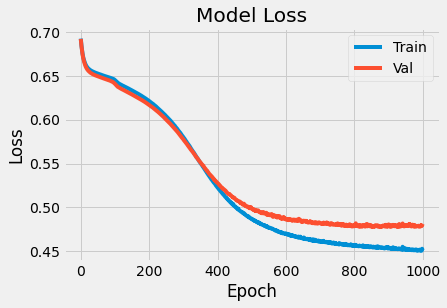

In [32]:
# Visulaize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()


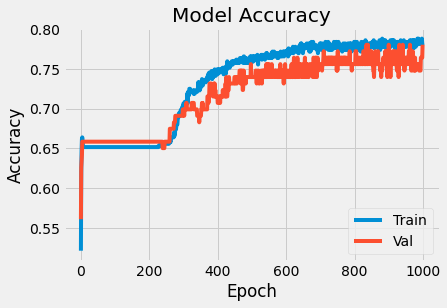

In [34]:
# Visulaize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [36]:
# Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction = [1 if y>=0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
229    0
235    1
750    1
365    0
449    0
      ..
154    1
69     0
561    1
37     1
538    0
Name: Outcome, Length: 154, dtype: int64


In [41]:
# Evaluate the model on training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_train)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       401
           1       0.70      0.63      0.67       213

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.75       614
weighted avg       0.77      0.78      0.78       614

Confusion Matrix: 
 [[343  58]
 [ 78 135]]

Accuracy:  0.7785016286644951


In [42]:
pred_test = model.predict(X_test)
pred_test = [1 if y>=0.5 else 0 for y in pred_test]
print(classification_report(y_test, pred_test))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_test))
print()
print('Accuracy: ', accuracy_score(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        99
           1       0.78      0.64      0.70        55

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

Confusion Matrix: 
 [[89 10]
 [20 35]]

Accuracy:  0.8051948051948052
